In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import itertools
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
infile = open('preprocessed_umfrage.pkl','rb')
df = pickle.load(infile)
infile.close()

In [3]:
df

,UserID,Erstloesung,Erfolg,Schwierigkeit,Wochentag,ist_Schulzeit,MehrfachFalsch,Testposition__FT,Testposition__nt,Testposition__pruefung,...,9992995,9992996,9992997,9992998,9992999,9993000,9993001,AbiEltern,Buecher,eigSprache
0,509878,1,0,-1.207390,2,1,1,0,0,0,...,0,0,0,0,0,0,0,2,3.0,1.0
1,509878,0,1,-1.207390,2,1,0,0,0,0,...,0,0,0,0,0,0,0,2,3.0,1.0
2,509878,0,1,-1.207390,2,1,0,0,0,1,...,0,0,0,0,0,0,0,2,3.0,1.0
3,509878,1,0,0.083314,2,1,1,0,0,0,...,0,0,0,0,0,0,0,2,3.0,1.0
4,509878,0,1,0.083314,2,1,0,0,0,0,...,0,0,0,0,0,0,0,2,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886409,554157,1,1,-2.210790,2,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.0,1.0
886410,554157,1,1,-2.210790,2,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.0,1.0
886411,554157,1,0,1.769220,2,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.0,1.0
886412,554157,1,0,0.266961,2,0,1,0,0,0,...,0,0,0,0,0,0,0,2,2.0,1.0


Check Correlations

In [6]:
df_corr = df[['UserID','AbiEltern','eigSprache','Sex__m', 'Sex__w','Buecher', 'Erstloesung','Erfolg','Schwierigkeit','Wochentag','ist_Schulzeit','MehrfachFalsch','Testposition__FT', 'Testposition__nt', 'Testposition__pruefung',
       'Testposition__training', 'Testposition__version', 'Testposition__vt',
       'Testposition__zt', 'beendet', 'Fehler', 'HA__HA', 'HA__Self', 'HA__nt',
       'HA__vt', 'HA__zt', 'Klassenstufe', 'Jahredabei']]
df_corr = df_corr.drop_duplicates()
df_corr = df_corr.drop(columns=['UserID'])
df_corr['AbiEltern'] = np.where((df_corr.AbiEltern == '2'),'1',df_corr.AbiEltern)
df_corr.AbiEltern = df_corr.AbiEltern.astype('float')
df_corr.Buecher = df_corr.Buecher.astype('float')

c = df_corr.corr(method='pearson')

In [7]:
writer = pd.ExcelWriter('correlationsNewModel.xlsx', engine='xlsxwriter')
c.to_excel(writer, sheet_name='corr')
writer.save()

Check Correlations only Demographics

In [3]:
df_corr = df[['UserID','AbiEltern','eigSprache','Sex__m', 'Sex__w','Buecher']]
df_corr = df_corr.drop_duplicates()
df_corr = df_corr.drop(columns=['UserID'])
df_corr['AbiEltern'] = np.where((df_corr.AbiEltern == '2'),'1',df_corr.AbiEltern)
df_corr.AbiEltern = df_corr.AbiEltern.astype('float')
c = df_corr.corr(method='pearson')

In [4]:
#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. 
# Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation. 
# Low degree: When the value lies below + . 29, then it is said to be a small correlation.


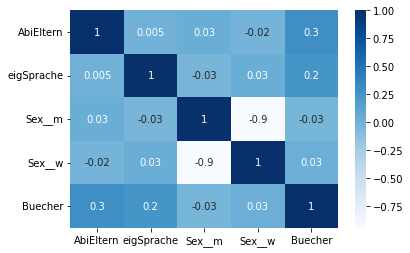

In [5]:
heatmap = sns.heatmap(c, annot=True, cmap="Blues", fmt='.1g')

Subgrouping for intersektional analysis

In [21]:
################### SUBGROUPING

# Abi eltern
df.AbiEltern = df.AbiEltern.astype('float')
df_abi = df[df.AbiEltern > 0]
df_keinAbi = df[df.AbiEltern ==0]

#Gender
df_boys = df[df.Sex__m == 1]
df_girls = df[df.Sex__w == 1]

# Migration
df_deutsch = df[df.eigSprache == 1]
df_migration = df[df.eigSprache == 0]

# Anzahl Bücher
df['Buecher'] = df['Buecher'].replace(['10'],0)
df['Buecher'] = df['Buecher'].replace(['200'],1)
df_buch0 = df[df.Buecher == 0.0]
df_buch1 = df[df.Buecher == 1]


# # # Abi Eltern mit Migration
# df_abi_deutsch = df_abi[df_abi.eigSprache == 1]
# df_abi_migration = df_abi[df_abi.eigSprache == 0]
# df_keinAbi_migration = df_keinAbi[df_keinAbi.eigSprache == 0]
# df_keinAbi_deutsch = df_keinAbi[df_keinAbi.eigSprache == 1]

# # # Abi Eltern mit Gender
# df_abi_w = df_abi[df_abi.Sex__w == 1]
# df_abi_m =df_abi[df_abi.Sex__m == 1]
# df_keinAbi_w= df_keinAbi[df_keinAbi.Sex__w==1]
# df_keinAbi_m = df_keinAbi[df_keinAbi.Sex__m==1]

# # Abi Eltern mit Bücher
df_abi_buch0 = df_abi[df_abi.Buecher == 0.0]
df_abi_buch1 = df_abi[df_abi.Buecher == 1]
df_keinAbi_buch0 = df_keinAbi[df_keinAbi.Buecher == 0.0]
df_keinAbi_buch1 = df_keinAbi[df_keinAbi.Buecher == 1]

# Gender mit Migration
# df_w_migration = df_girls[df_girls.eigSprache == 0]
# df_w_deutsch = df_girls[df_girls.eigSprache == 1]
# df_m_migration = df_boys[df_boys.eigSprache == 0]
# df_m_deutsch = df_boys[df_boys.eigSprache == 1]

# # Gender mit Bücher
# df_w_buch0 = df_girls[df_girls.Buecher == 0.0]
# df_w_buch1 = df_girls[df_girls.Buecher == 1]
df_m_buch0 = df_boys[df_boys.Buecher == 0.0]
df_m_buch1 = df_boys[df_boys.Buecher == 1]



In [22]:
# Migration mit Bücher
df_migration_buch0 = df_migration[df_migration.Buecher == 0.0]
df_migration_buch1 = df_migration[df_migration.Buecher == 1]
# df_deutsch_buch0 = df_deutsch[df_deutsch.Buecher == 0.0]
# df_deutsch_buch1 = df_deutsch[df_deutsch.Buecher == 1]

all_intersections = [
# df_abi_deutsch,
# df_abi_migration,
# df_keinAbi_migration,
# df_keinAbi_deutsch,
# df_abi_w,
# df_abi_m,
# df_keinAbi_w,
# df_keinAbi_m,
# df_abi_buch0,
# df_abi_buch1,
# df_keinAbi_buch0,
# df_keinAbi_buch1,###
# df_w_migration,
# df_w_deutsch,
# df_m_migration, 
# df_m_deutsch,
# df_w_buch0,
# df_w_buch1,
df_m_buch0,
df_m_buch1,##
df_migration_buch0,
df_migration_buch1,
# df_deutsch_buch0,
# df_deutsch_buch1 
]

all_intersections_string = [
# 'df_abi_deutsch',
# 'df_abi_migration',
# 'df_keinAbi_migration',
# 'df_keinAbi_deutsch',
# 'df_abi_w',
# 'df_abi_m',
# 'df_keinAbi_w',
# 'df_keinAbi_m',
# 'df_abi_buch0',
# 'df_abi_buch1',
# 'df_keinAbi_buch0',
# 'df_keinAbi_buch1',
# 'df_w_migration',
# 'df_w_deutsch',
# 'df_m_migration', 
# 'df_m_deutsch',
# 'df_w_buch0',
# 'df_w_buch1',
'df_m_buch0',
'df_m_buch1',
'df_migration_buch0',
'df_migration_buch1',
# 'df_deutsch_buch0',
# 'df_deutsch_buch1' 
]

#for x in all_intersections:
    #print(str(x))
    #print(len(x.UserID.unique()))

In [5]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold , cross_val_score
from sklearn import metrics 
from matplotlib import pyplot as plt
from numpy import mean
from numpy import absolute
import openpyxl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, accuracy_score, plot_roc_curve, plot_confusion_matrix, roc_curve, confusion_matrix
from matplotlib import pyplot
from tensorflow.keras.models import load_model
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [28]:
# Import feature list
infile = open('../04_predictionUserHistory/01_data/FINALsmallSampleSet_3months_without_duplicates.pkl','rb')
import_file = pickle.load(infile)
infile.close()
df_f = import_file
feature_cols = list(df_f.columns)

In [7]:
def get_metrics(clf,X,y):
    pred = clf.predict(X)
    a = accuracy_score(y,pred)
    p = precision_score(y,pred)
    r = recall_score(y,pred)
    roc_auc = roc_auc_score(y,pred)
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    fpr = fp/(fp+tn)

    return a,p,r,roc_auc,fpr

In [ ]:
# DECISION TREE
fair_metrics = pd.DataFrame(columns=['model', 'group', 'Accuracy', 'Precision', 'Recall', 'AUC', 'FPR'])

DTE_model = pickle.load(open('../04_predictionUserHistory/02_decisionTree/DecisionTreemodel_3months.pkl', 'rb'))

for (all_intersections, all_intersections_string) in zip(all_intersections, all_intersections_string):
    df = all_intersections
    dataset= df[df.columns[df.columns.isin(feature_cols)]]
    y = dataset['Erfolg']
    X = dataset.drop(columns=['Erfolg'])
    a,p,r,roc_auc,fpr = get_metrics(DTE_model,X,y)
    fair_metrics = fair_metrics.append({'model':'DTE','group':all_intersections_string,'Accuracy':a,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)

In [12]:
fair_metrics.to_excel('intersectional_DTEmetrics.xlsx')


In [ ]:
# Logistic Regression
logreg_model = pickle.load(open('../04_predictionUserHistory/03_logisticRegression/Logregmodel_3months.pkl', 'rb'))

for (all_intersections, all_intersections_string) in zip(all_intersections, all_intersections_string):
    df = all_intersections

    dataset = df[df.columns[df.columns.isin(feature_cols)]]
    y = dataset['Erfolg']
    X = dataset.drop(columns=['Erfolg'])

    a,p,r,roc_auc,fpr = get_metrics(logreg_model,X,y)
    fair_metrics = fair_metrics.append({'model':'LogReg','group':all_intersections_string,'Accuracy':a,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)

In [17]:
fair_metrics.to_excel('intersectional_LRmetrics.xlsx')


In [ ]:
# SVM
svm_model = pickle.load(open('../04_predictionUserHistory/04_svm/SVMmodel_3months.pkl', 'rb'))

for (all_intersections, all_intersections_string) in zip(all_intersections, all_intersections_string):
    df = all_intersections

    dataset = df[df.columns[df.columns.isin(feature_cols)]]
    y = dataset['Erfolg']
    X = dataset.drop(columns=['Erfolg'])
    a,p,r,roc_auc,fpr = get_metrics(svm_model,X,y)
    fair_metrics = fair_metrics.append({'model':'SVM','group':all_intersections_string,'Accuracy':a,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)

In [20]:
fair_metrics.to_excel('intersectional_SVMmetrics.xlsx')


In [29]:
# NN
fair_metrics = pd.DataFrame(columns=['model', 'group', 'Accuracy', 'Precision', 'Recall', 'AUC', 'FPR'])

nn_model = load_model('../04_predictionUserHistory/05_nn/nn_3months/')

def get_dn_metrics(model, X,y):
    X = np.asarray(X).astype('float32')
    yhat_probs = model.predict(X, verbose=0)
    yhat_classes =  (model.predict(X) > 0.5).astype("int32")
    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    yhat_classes = yhat_classes[:, 0]
    a = accuracy_score(y, yhat_classes)
    p = precision_score(y, yhat_classes)
    r = recall_score(y, yhat_classes)
    roc_auc = roc_auc_score(y, yhat_probs)
    tn, fp, fn, tp = confusion_matrix(y, yhat_classes).ravel()
    fpr = fp/(fp+tn)

    return a,p,r,roc_auc,fpr

for (all_intersections, all_intersections_string) in zip(all_intersections, all_intersections_string):
    df = all_intersections

    dataset = df[df.columns[df.columns.isin(feature_cols)]]
    y = dataset['Erfolg']
    X = dataset.drop(columns=['Erfolg'])

    a,p,r,roc_auc,fpr = get_dn_metrics(nn_model,X,y)
    fair_metrics = fair_metrics.append({'model':'NN','group':all_intersections_string,'Accuracy':a,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)

581/581 [==============================] - 1s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_17992\2558649748.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fair_metrics = fair_metrics.append({'model':'NN','group':all_intersections_string,'Accuracy':a,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


2193/2193 [==============================] - 5s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_17992\2558649748.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fair_metrics = fair_metrics.append({'model':'NN','group':all_intersections_string,'Accuracy':a,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


628/628 [==============================] - 1s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_17992\2558649748.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fair_metrics = fair_metrics.append({'model':'NN','group':all_intersections_string,'Accuracy':a,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


1452/1452 [==============================] - 3s 2ms/step


C:\Users\Nathalie\AppData\Local\Temp\ipykernel_17992\2558649748.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fair_metrics = fair_metrics.append({'model':'NN','group':all_intersections_string,'Accuracy':a,'Precision': p, 'Recall':r, 'AUC':roc_auc, 'FPR':fpr}, ignore_index=True)


In [30]:
fair_metrics.to_excel('intersectional_NNmetrics6.xlsx')


In [ ]:
fair_metrics.to_excel('intersectional_ALLmetrics.xlsx')
